# Analisi dati - Bilancia di Cavendish - Escursione finale
N. Bagnasco

Input: datimm.csv


## Calcolo Max e Min: risultati

### Dataframe

,Massimi (x),Massimi (y),Minimi (x),Minimi (y)
0,10.0,31.8,260.0,6.5
1,540.0,26.0,800.0,10.9
2,1040.0,22.6,1320.0,13.6
3,1600.0,20.7,1860.0,15.1
4,2120.0,19.6,2400.0,16.0
5,2640.0,18.7,2920.0,16.8
6,3200.0,18.2,3440.0,17.0


### LaTeX Table


\begin{table}[ht]
\centering
\caption{Coordinate di massimi e minimi}
\label{fit502}
\begin{tabular}{rrrr}
\toprule
 Massimi (x) &  Massimi (y) &  Minimi (x) &  Minimi (y) \\
\midrule
        10.0 &         31.8 &       260.0 &         6.5 \\
       540.0 &         26.0 &       800.0 &        10.9 \\
      1040.0 &         22.6 &      1320.0 &        13.6 \\
      1600.0 &         20.7 &      1860.0 &        15.1 \\
      2120.0 &         19.6 &      2400.0 &        16.0 \\
      2640.0 &         18.7 &      2920.0 &        16.8 \\
      3200.0 &         18.2 &      3440.0 &        17.0 \\
\bottomrule
\end{tabular}
\end{table}



### Figura in LaTeX


\begin{figure}[!ht]
\includegraphics[width=12cm]{ fig2206.png }
\centering
\caption{Scatter dei dati, con minimi e massimi evidenziati}
\end{figure}





### Plot

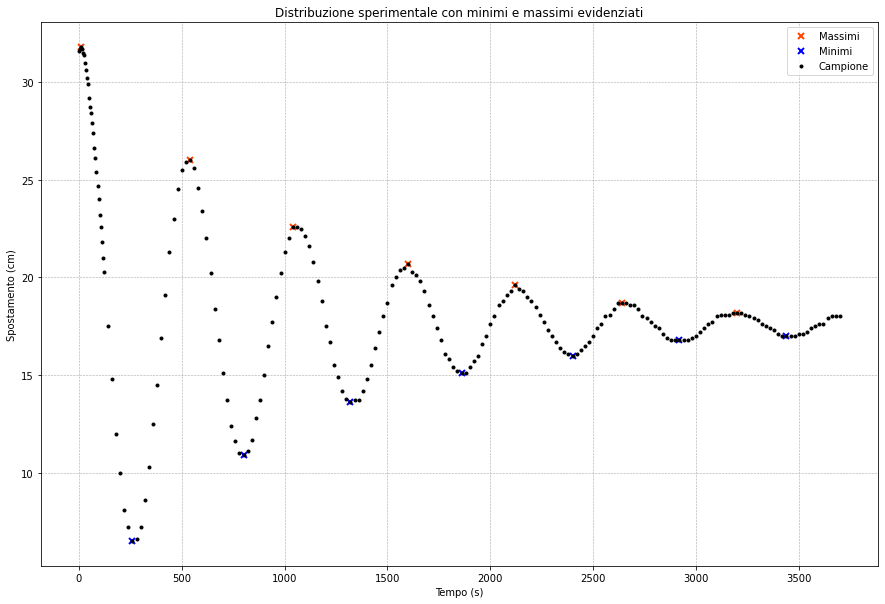

In [253]:
import numpy as np
import scipy
import csv
import matplotlib.pyplot as plt
from IPython.display import display, HTML, Markdown
import pandas as pd
from random import randint


#Livello di criticità es. (.05)
alpha=.05
unma='cm'
unmb='N'

#Importo dati.csv con tre colonne (x, y, yerr) in tre liste

data = csv.reader(open('datim.csv', 'r'), delimiter=",", quotechar='|')
lxcol, lycol, lyerrcol = [], [], []

for row in data:
    lxcol.append(row[0])
    lycol.append(row[1])
   # lyerrcol.append(row[2])
    
#Converto in array
xxdata = np.asarray(lxcol, dtype=np.float64)
yydata = np.asarray(lycol, dtype=np.float64)
#yerr = np.asarray(lyerrcol, dtype=np.float64)

peaks, _ = find_peaks(yydata)
valleys, _ = find_peaks(inv_yydata)

xxpea=xxdata[peaks]
yypea=yydata[peaks]
inv_yydata = yydata*(-1)
xxvall=xxdata[valleys]
yyvall=yydata[valleys]

###PLOT

plt.rcParams['figure.figsize'] = [15, 10]
randfig=str(randint(0, 9999))
namefig='fig'+randfig+'.png'
fig, ax = plt.subplots()
ax.set_xlabel('Tempo (s)')
ax.set_ylabel('Spostamento (cm)')
ax.set_title('Distribuzione sperimentale con minimi e massimi evidenziati')


plt.grid(which='both',linestyle='--', linewidth=0.6)
plt.errorbar(xxdata,yydata,fmt='.',color='black')
plt.plot(xxpea, yypea, "rx",color='orangered', mew=2)
plt.plot(xxvall, yyvall, "x",color='blue', mew=2)
plt.legend(['Massimi', 'Minimi', 'Campione'])
#plt.savefig(namefig)


nppeaksx=np.array(xxdata[peaks])
nppeaksy=np.array(yydata[peaks])
npvalleysx=np.array(xxdata[valleys])
npvalleysy=np.array(yydata[valleys])

df = pd.DataFrame({})
df['Massimi (x)'] = nppeaksx.tolist()
df['Massimi (y)'] = nppeaksy.tolist()
df['Minimi (x)'] = npvalleysx.tolist()
df['Minimi (y)'] = npvalleysy.tolist()

display(Markdown('## Calcolo Max e Min: risultati'))
print()
display(Markdown('### Dataframe'))
display(df)
display(Markdown('### LaTeX Table'))
print()
print(df.to_latex(index=False,  caption='Coordinate di massimi e minimi', bold_rows=True, label=indexfit, position='ht'))

#LaTeX image handling
display(Markdown('### Figura in LaTeX'))
print("""
\\begin{figure}[!ht]
\includegraphics[width=12cm]{""",namefig,"""}
\centering
\caption{Scatter dei dati, con minimi e massimi evidenziati}
\end{figure}

""")
print()
display(Markdown('### Plot'))
print()
 

$k=\frac{8\pi^2 \cdot m \cdot d^2}{T^2} $
$G=\frac{\pi^{2} \Delta S r^{2} d}{M L T^{2}}$

In [256]:
display(Markdown('### Periodo medio'))
#-2 perche scarto ultimi dati
period=[]
for i in range(1,len(nppeaksx)-2):
    n=i+1
    dt=nppeaksx[n]-nppeaksx[i]
    period.append(dt)
    i+=1
for i in range(1,len(npvalleysx)-2):
    n=i+1
    dt=npvalleysx[n]-npvalleysx[i]
    period.append(dt)
    i+=1

nperiod=np.array(period)
print("periodi:" ,nperiod)
peravg=np.average(nperiod)
print('Periodo medio',peravg)
msmall=0.015
mbig=1.503
r=0.045
L=5.47
dist=0.05
k=(8*((np.pi)**2)*msmall*(dist**2))/(peravg**2)
print("k= ",k)
pksavgarr=nppeaksy
pksavgarr=np.delete(pksavgarr,0)
pksavg=np.average(pksavgarr)
vallavgarr=npvalleysy
print("pksavgarr: ",pksavgarr)
print("vallavgarr: ",vallavgarr)

vallavg=np.average(vallavgarr)
seq=nppeaksy[0]
print("medie max e min: ", pksavg, vallavg)
x0avg=((pksavg+vallavg)/2)
print("Posizione di equilibrio finale S_eq: ", x0avg)

#print("Posizione iniziale S_0: ", yydata[0])
print("Posizione iniziale S_0: ", seq)
deltas=seq-x0avg
print("Delta_S: ",deltas)
deltasconv=deltas*(10**(-2))

num_G=((np.pi)**2)*deltasconv*(r**2)*dist
den_G=mbig*L*(peravg**2)
G=num_G/den_G
print("G: ", G)

d_gamma=(r**2+(4*(dist**2)))**(3/2)
gamma=(r**3)/d_gamma
G_corr=G/(1-gamma)
print("G_corr: ", G_corr)

### Periodo medio

periodi: [500. 560. 520. 520. 520. 540. 540. 520.]
Periodo medio 527.5
k=  1.0640843899559517e-08
pksavgarr:  [26.  22.6 20.7 19.6 18.7 18.2]
vallavgarr:  [ 6.5 10.9 13.6 15.1 16.  16.8 17. ]
medie max e min:  20.96666666666667 13.700000000000001
Posizione di equilibrio finale S_eq:  17.333333333333336
Posizione iniziale S_0:  31.8
Delta_S:  14.466666666666665
G:  6.319344290042625e-11
G_corr:  6.78846139249615e-11


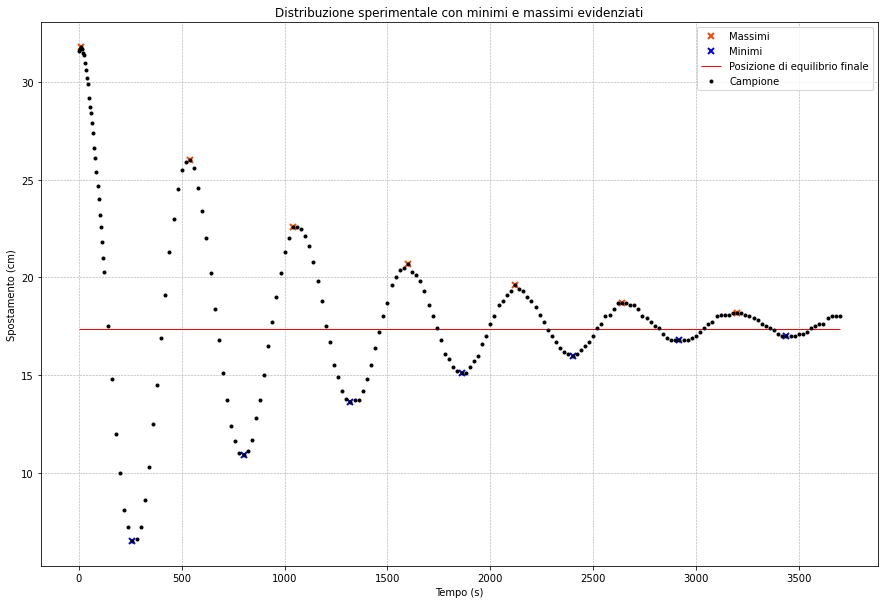

In [255]:
plt.rcParams['figure.figsize'] = [15, 10]
randfig=str(randint(0, 9999))
namefig='fig'+randfig+'.png'
fig, ax = plt.subplots()
ax.set_xlabel('Tempo (s)')
ax.set_ylabel('Spostamento (cm)')
ax.set_title('Distribuzione sperimentale con minimi e massimi evidenziati')
ax.hlines(y=x0avg, xmin=0, xmax=xxdata[-1], linewidth=1, color='r')

plt.grid(which='both',linestyle='--', linewidth=0.6)
plt.errorbar(xxdata,yydata,fmt='.',color='black')
plt.plot(xxpea, yypea, "rx",color='orangered', mew=2)
plt.plot(xxvall, yyvall, "x",color='blue', mew=2)
plt.legend(['Massimi', 'Minimi','Posizione di equilibrio finale', 'Campione'])
#plt.savefig(namefig)

